In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

# Импорт данных

In [2]:
rhob10 = np.loadtxt("rhob_10.csv")
rhob30 = np.loadtxt("rhob_30.csv")
rhob50 = np.loadtxt("rhob_50.csv")

# Визуализация

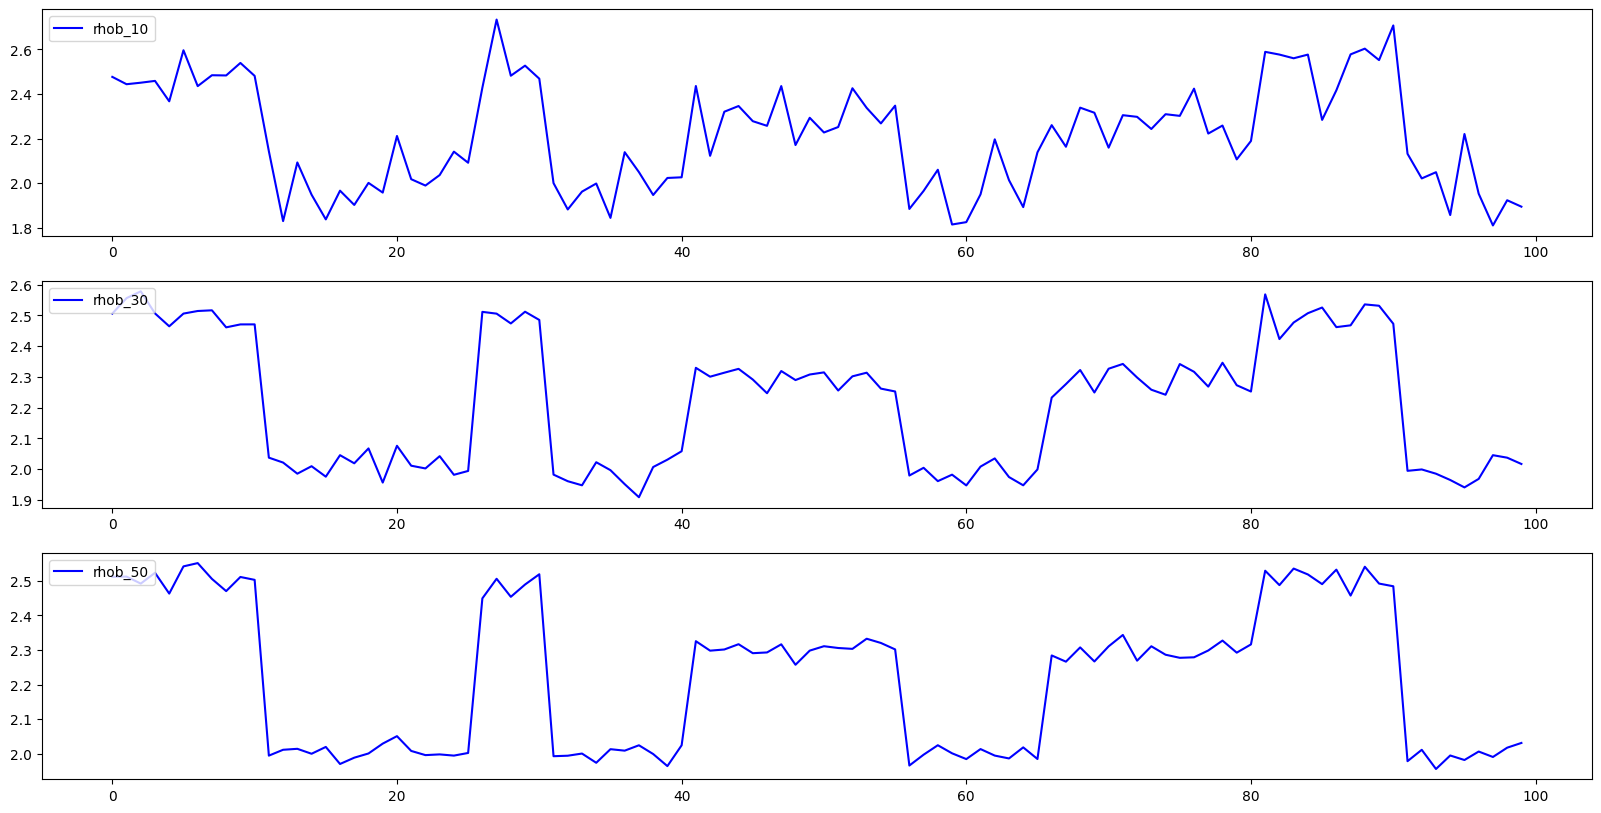

In [22]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))
x = np.arange(0,100, 1)
for ax, data, name in zip(axs, (rhob10, rhob30, rhob50), ('rhob_10', 'rhob_30', 'rhob_50')):
    ax.plot(x, data, c="b", label=name)
    ax.legend(loc="upper left")


# Кластеризация
Использовать будем метод "к ближайшие" для разделения данных на n кластеров.

In [11]:
def data_dev(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data = data.reshape(-1, 1)
    kmeans.fit(data)
    constants = kmeans.cluster_centers_.flatten()
    appr_data = kmeans.predict(data)
    #заменяем класс на значение
    return np.array([constants[label] for label in appr_data])


### Пример кластеризации для 2 разбиений 

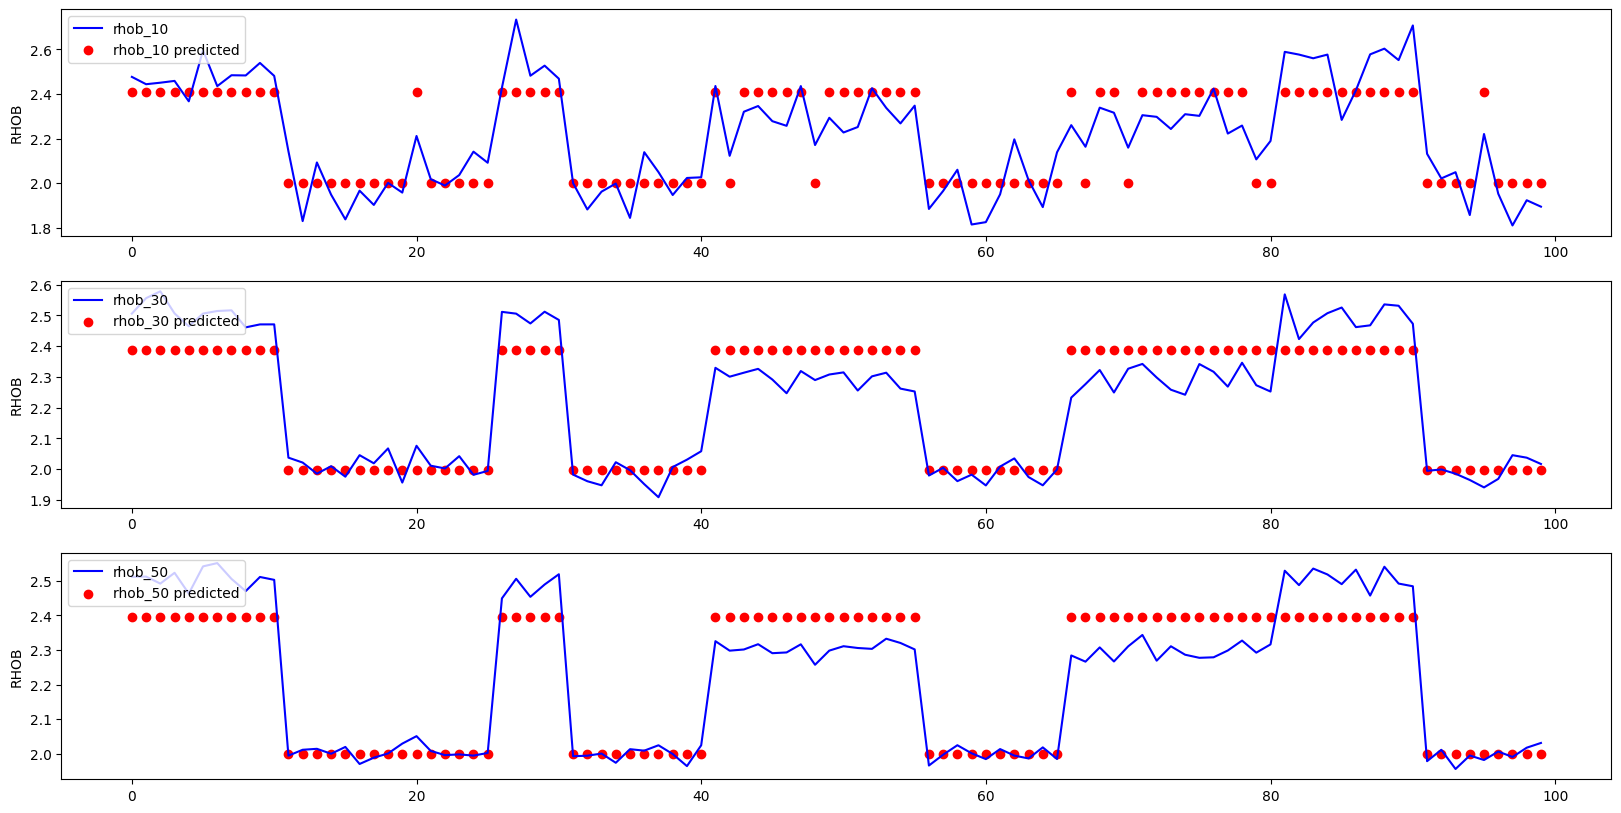

In [23]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))
x = np.arange(0,100, 1)
for ax, data, name in zip(axs, (rhob10, rhob30, rhob50), ('rhob_10', 'rhob_30', 'rhob_50')):
    ax.plot(x, data, c="b", label=name)
    ax.scatter(x, data_dev(data, 2), c="r" , label = name + " predicted")
    ax.legend(loc="upper left")
    ax.set_ylabel("RHOB")

## Оценим, сколько кластеров нужно для каждой кривой

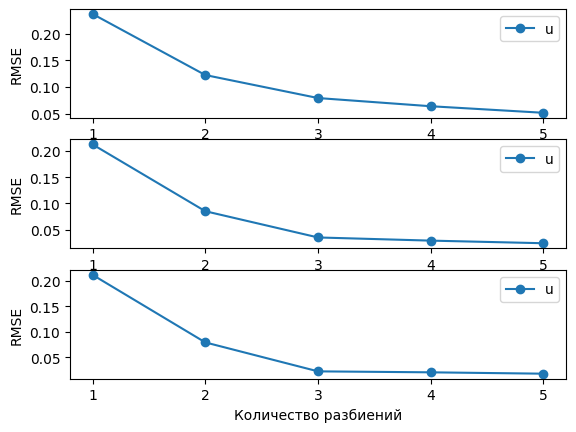

In [35]:
fig, axs = plt.subplots(3,1)
n_appr = np.arange(1, 6, 1)
rmse_10 = [RMSE(rhob10, data_dev(rhob10, n)) for n in n_appr]
rmse_30 = [RMSE(rhob30, data_dev(rhob30, n)) for n in n_appr]
rmse_50 = [RMSE(rhob50, data_dev(rhob50, n)) for n in n_appr]

axs[0].plot(n_appr, rmse_10, marker='o', label="rhob 10")
axs[1].plot(n_appr, rmse_30, marker='o', label="rhob 30")
axs[2].plot(n_appr, rmse_50, marker='o', label="rhob 50")
for i in range(len(axs)):
    axs[i].legend("upper right")
    axs[i].set_xlabel("Количество разбиений")
    axs[i].set_ylabel("RMSE")
    axs[i].set_xticks(n_appr)
    axs[i].locator_params(axis='y', nbins=5)

Как можно заметить, после 3 разбиений среднеквадратичное отклонение меняется незначительно и, вероятнее всего, переобучается. Поэтому остановимся на 3
# Итог разбиения

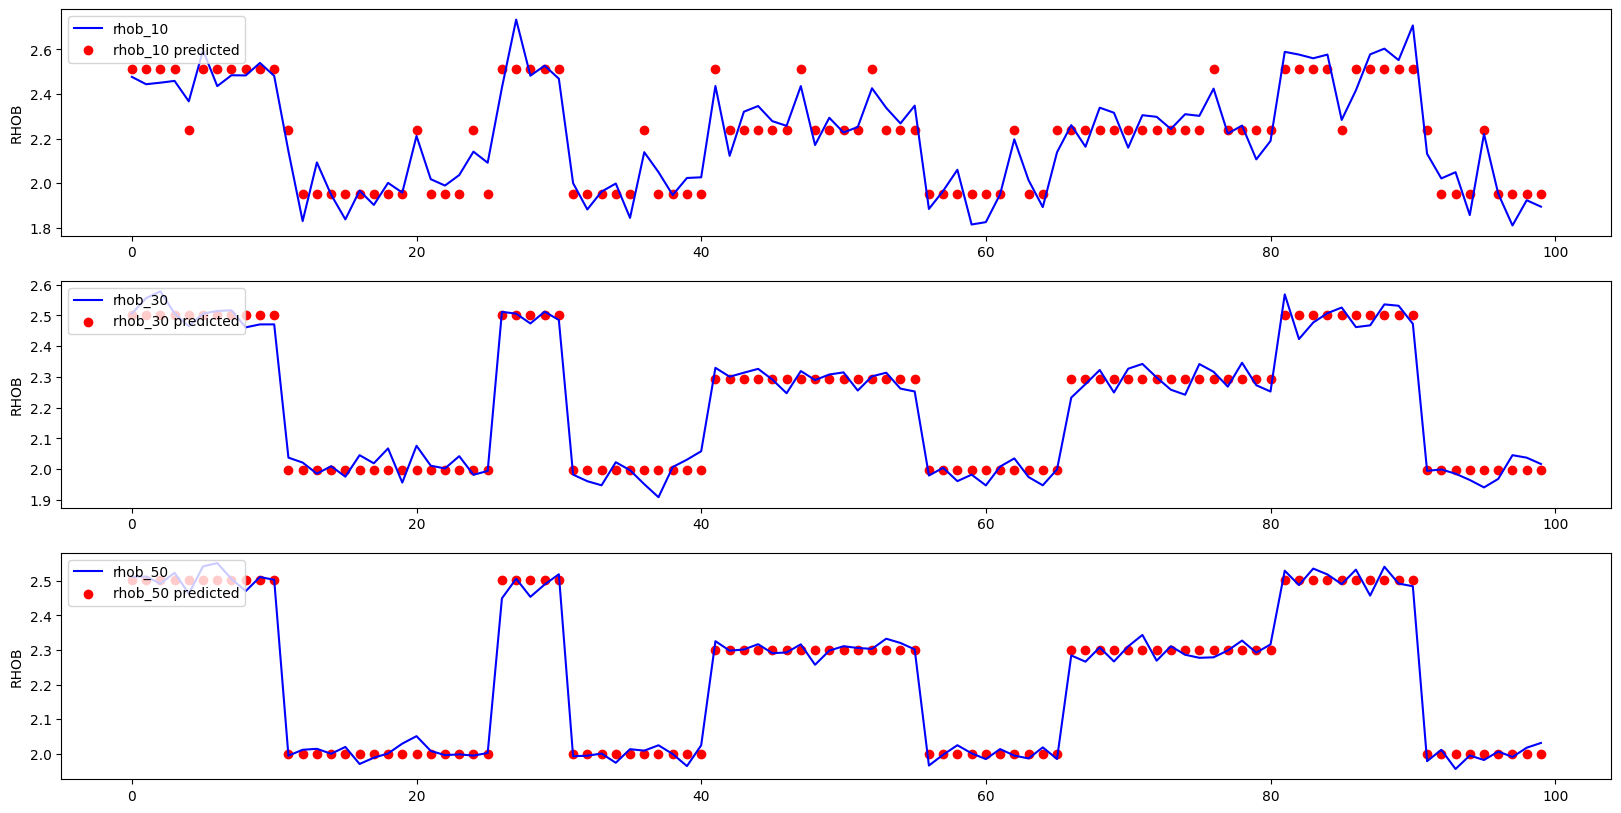

In [36]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))
x = np.arange(0,100, 1)
for ax, data, name in zip(axs, (rhob10, rhob30, rhob50), ('rhob_10', 'rhob_30', 'rhob_50')):
    ax.plot(x, data, c="b", label=name)
    ax.scatter(x, data_dev(data, 3), c="r" , label = name + " predicted")
    ax.legend(loc="upper left")
    ax.set_ylabel("RHOB")

Данные RHOB 10 очень сильно зашумлены, и даже на разбиении появляются неточности. Однако, при 2 разбиениях теряется довольно ценная информация. Которой не стоит жертвовать